<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/TensorFlow/_007_neural_network_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

## create a dataset

In [38]:
# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
x1 = np.round(np.random.uniform(40,80,1500),2).astype(np.float32)
x2 = np.round(np.random.uniform(500,900,1500),2).astype(np.float32)
noise = np.round(np.random.uniform(4, 8, 1500), 2).astype(np.float32)

In [40]:
# Calculate y = x1 * 0.42 + x2 * 0.6 + noise
y = np.round(x1 * 0.42 + x2 * 0.6 + noise, 2)

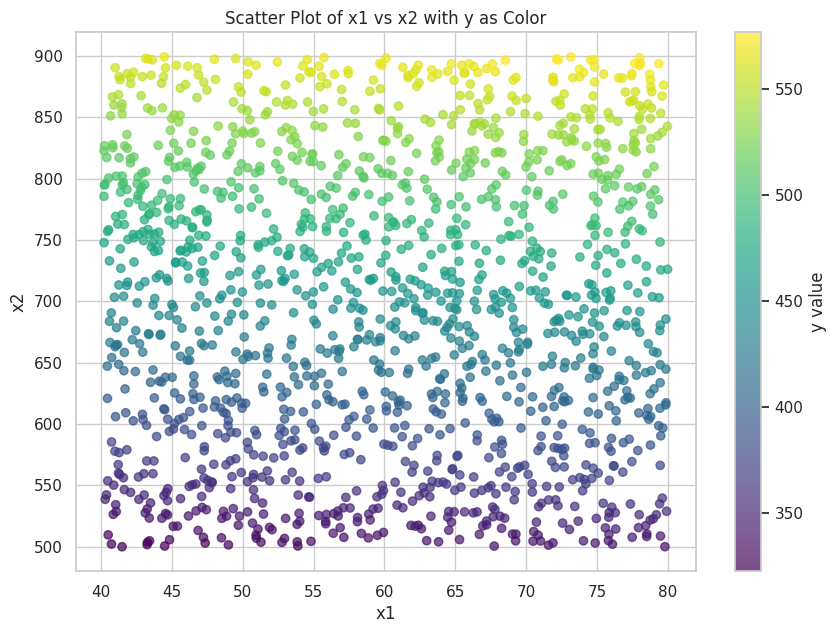

In [86]:
# Plotting
plt.figure(figsize=(10, 7))
sc = plt.scatter(x1, x2, c=y, cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='y value')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of x1 vs x2 with y as Color')
plt.grid(True)
plt.show()

In [41]:
df = pd.DataFrame({"x1":x1,"x2":x2,"y":y})

In [42]:
df.head()

,x1,x2,y
0,54.980000,707.630005,454.359985
1,78.029999,691.669983,454.959991
2,69.279999,510.260010,340.250000
3,63.950001,636.500000,415.260010
4,46.240002,652.080017,416.959991


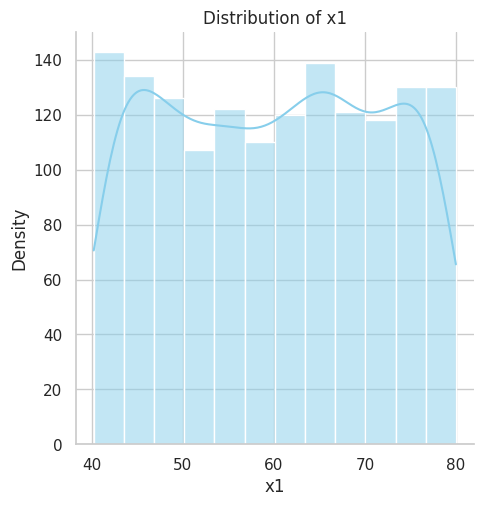

In [43]:
# Plot the distributions using sns.displot
sns.set(style="whitegrid")

# Distribution of x1
sns.displot(df['x1'], kde=True, color='skyblue')
plt.title('Distribution of x1')
plt.xlabel('x1')
plt.ylabel('Density')
plt.show()

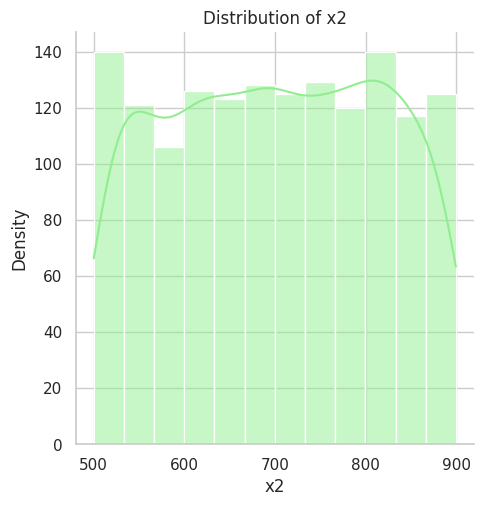

In [44]:
# Distribution of x2
sns.displot(df['x2'], kde=True, color='lightgreen')
plt.title('Distribution of x2')
plt.xlabel('x2')
plt.ylabel('Density')
plt.show()

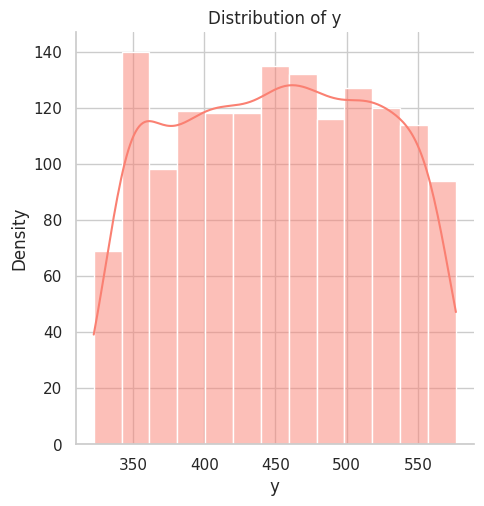

In [45]:
# Distribution of y
sns.displot(df['y'], kde=True, color='salmon')
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Density')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split


# Split the data into features (X) and target (y)
X = df[['x1', 'x2']].values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Create a Normalization layer and adapt it to the training data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

In [50]:
# Normalize the data using the normalization layer
X_train_normalized = normalizer(X_train).numpy()
X_test_normalized = normalizer(X_test).numpy()

In [51]:
# Convert normalized data back to a DataFrame for easier plotting
df_normalized = pd.DataFrame(X_train_normalized, columns=['x1', 'x2'])

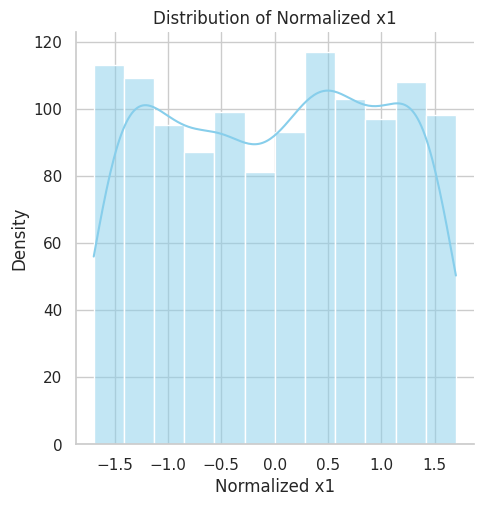

In [52]:
# Plot the distribution of the normalized features
sns.displot(df_normalized['x1'], kde=True, color='skyblue')
plt.title('Distribution of Normalized x1')
plt.xlabel('Normalized x1')
plt.ylabel('Density')
plt.show()

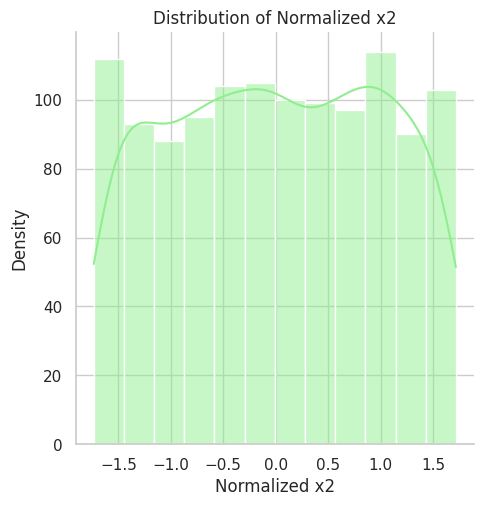

In [53]:
sns.displot(df_normalized['x2'], kde=True, color='lightgreen')
plt.title('Distribution of Normalized x2')
plt.xlabel('Normalized x2')
plt.ylabel('Density')
plt.show()

In [70]:
tf.keras.backend.clear_session()

In [76]:
# Build the TensorFlow regression model
model = tf.keras.Sequential([
    normalizer,  # Normalizes the input data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 208274.7031 - mae: 451.2037 - val_loss: 202284.3281 - val_mae: 443.8169
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 201900.3125 - mae: 444.0174 - val_loss: 173661.1719 - val_mae: 410.0575
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 153192.6719 - mae: 383.0285 - val_loss: 50126.2422 - val_mae: 205.2498
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29046.3574 - mae: 146.3682 - val_loss: 10087.4326 - val_mae: 83.8752
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7269.5586 - mae: 70.3294 - val_loss: 7801.7466 - val_mae: 72.1242
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6412.9912 - mae: 65.7651 - val_loss: 6731.9487 - val_mae: 67.3713
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5491.7695 - mae: 61.0493 - val_loss: 5731.5435 - val_mae: 62.6645
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4619.9248 - mae: 56.4319 - val_loss: 4832.3921 - val_

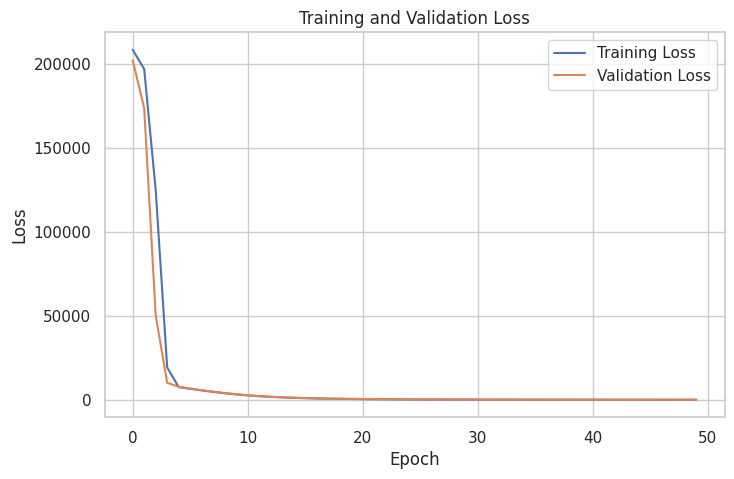

In [77]:
# Plot the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2990 - mae: 3.6157 
Test Loss: 18.805023193359375
Test MAE: 3.5694656372070312


In [79]:
# Make predictions
y_pred = model.predict(X_test)

# Compare predictions with actual values (optional)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [80]:
# Compare predictions with actual values (optional)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
comparison_df.head()

,Actual,Predicted
0,412.459991,408.521118
1,392.269989,390.213562
2,474.089996,471.610046
3,420.269989,415.349182
4,385.829987,379.696289
